## Analisis de datos sobre 'Speed Dating'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#loading data
data = pd.read_csv('./data/dating.csv' )
data.describe()

,gender,age,income,goal,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
count,8378.000000,8283.000000,4279.000000,8299.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000
mean,0.500597,26.358928,44887.606450,2.122063,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,0.948769
std,0.500029,3.566763,17206.920962,1.407181,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285,2.129565,0.989889
min,0.000000,18.000000,8607.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,31516.000000,1.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,1.000000,26.000000,43185.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,1.000000,28.000000,54303.000000,2.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,1.000000,55.000000,109031.000000,6.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


#### Proporcion de hombres y mujeres

Hombres = 1,
Mujeres = 0

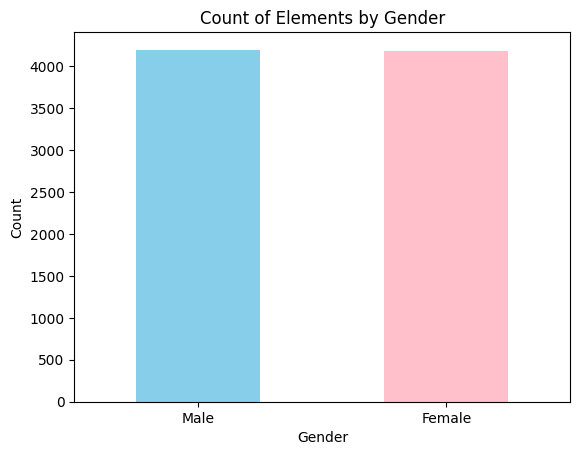

In [67]:
gender_counts = data['gender'].value_counts()
# Create a bar graph
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])

# Adding titles and labels
plt.title('Count of Elements by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0], labels=['Female', 'Male'], rotation=0)  # Setting custom x-axis labels

# Show the plot
plt.show()

#### Atractivo segun edad por genero

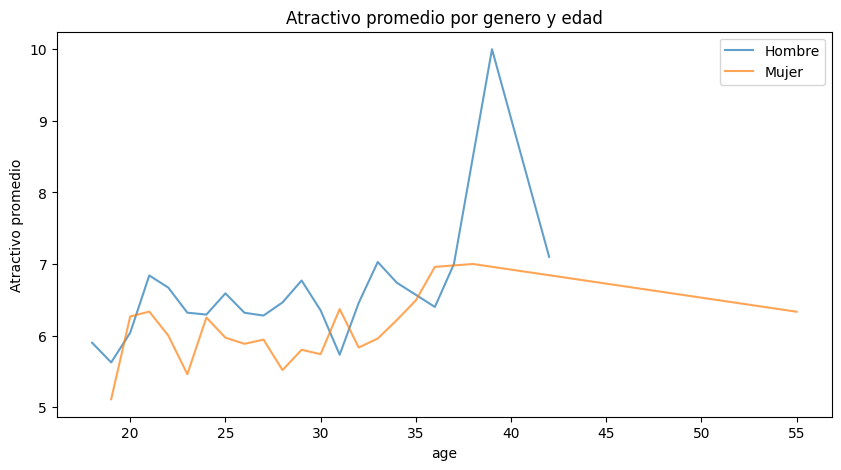

In [65]:
avg_attr = data.groupby(['age', 'gender'])['attr'].mean().reset_index()
avg_attr_male = avg_attr[avg_attr['gender'] == 1]
avg_attr_female = avg_attr[avg_attr['gender'] == 0]

plt.figure(figsize=(10, 5))
plt.plot(avg_attr_male['age'], avg_attr_male['attr'], label='Hombre', alpha=0.7)
plt.plot(avg_attr_female['age'], avg_attr_female['attr'], label='Mujer', alpha=0.7)

plt.title('Atractivo promedio por genero y edad')
plt.xlabel('age')
plt.ylabel('Atractivo promedio')
plt.legend() 

plt.show()


#### Atractivo segun intelecto

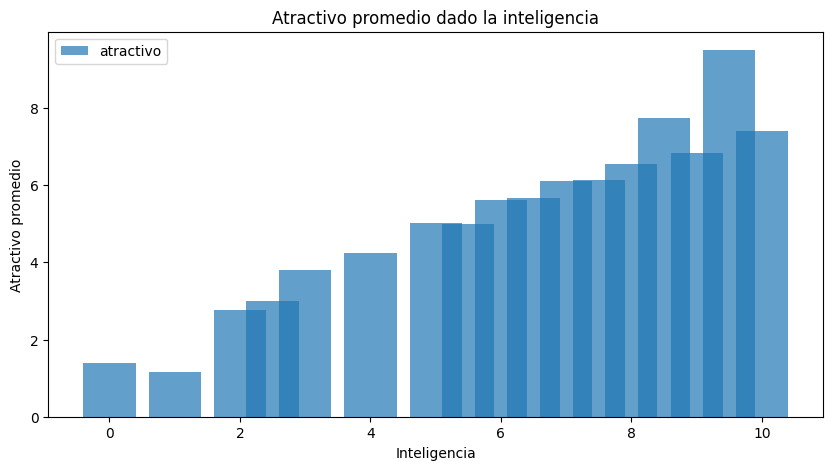

In [63]:
avg_attr_intel = data.groupby(['intel'])['attr'].mean().reset_index()
avg_attr_intel_male = avg_attr[avg_attr['gender'] == 0]
avg_attr_intel_female = avg_attr[avg_attr['gender'] == 1]

plt.figure(figsize=(10, 5))
plt.bar(avg_attr_intel['intel'], avg_attr_intel['attr'], label='atractivo', alpha=0.7)

plt.title('Atractivo promedio dado la inteligencia')
plt.xlabel('Inteligencia')
plt.ylabel('Atractivo promedio')
plt.legend() 

plt.show()


#### Atractivo segun sinceridad

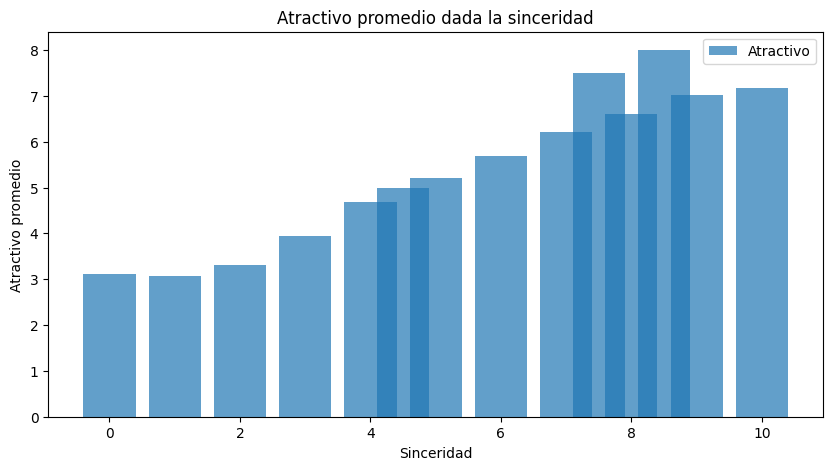

In [62]:
avg_attr_sinc = data.groupby(['sinc'])['attr'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(avg_attr_sinc['sinc'], avg_attr_sinc['attr'], label='Atractivo', alpha=0.7)

plt.title('Atractivo promedio dada la sinceridad')
plt.xlabel('Sinceridad')
plt.ylabel('Atractivo promedio')
plt.legend() 

plt.show()

#### Atractivo e ingresos

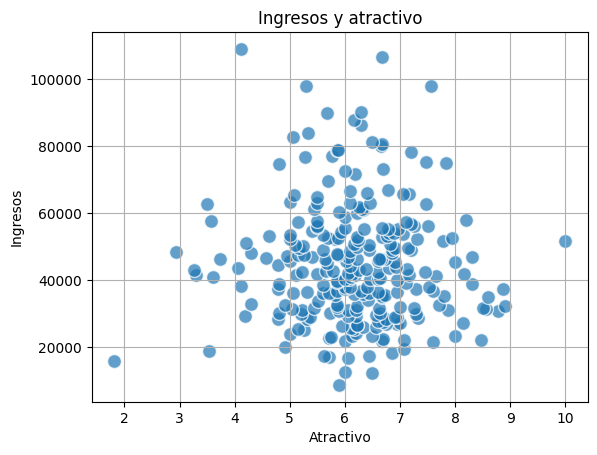

In [60]:
with_income = data[data['income'].notna()]
avg_attr_income = data.groupby(['income'])['attr'].mean().reset_index()
plt.scatter(avg_attr_income['attr'], avg_attr_income['income'], alpha=0.7, edgecolors='w', s=100)  

# Adding labels and title
plt.xlabel('Atractivo')
plt.ylabel('Ingresos')
plt.title('Ingresos y atractivo')
plt.grid(True)  # Optional: Adds a grid for better readability
# Show the plot
plt.show()

#### Probabilidad de ser un match dado intereses compartidos

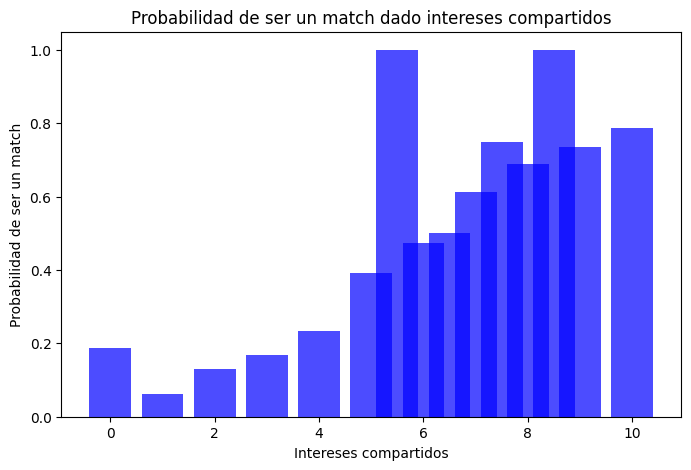

In [59]:
success_given_interest = data.groupby('shar')['dec'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(success_given_interest['shar'], success_given_interest['dec'], color='blue', alpha=0.7)
plt.title('Probabilidad de ser un match dado intereses compartidos')
plt.xlabel('Intereses compartidos')
plt.ylabel('Probabilidad de ser un match')
plt.show()